### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV files
reviews = pd.read_csv('turtle_reviews.csv')
sales = pd.read_csv('turtle_sales.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Check for missing values.
reviews_na = reviews[reviews.isna().any(axis=1)]

print(reviews_na.shape[0],"Rows with Missing Data")
reviews_na

0 Rows with Missing Data


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


In [4]:
# Explore the data.
reviews.info()
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [5]:
# Check Headers
print("Headers: ","\n", reviews.columns,"\n")

Headers:  
 Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object') 



> The client is interested in :
>- the possible relationships between the __age, remuneration, spending scores, and loyalty points__
>- the impact that each __product__ has on sales
>- marketing based on social data (e.g. customer __reviews__ _& summary_) and groups within the customer base _(__gender, education level__)_
>> keep only these columns <br>

> Based on the Turtle Games Metadata, the language and platform data are inconsequential as they are uniform
>> "All the reviews were in English." : EN <br>"All the reviews were obtained from the website of Turtle Games." : Web <br>

> __remove < 'language', 'platform' >__ columns

In [43]:
# Drop unnecessary columns.
reviews_clean = reviews.copy().drop(columns=['language', 'platform'])

# View column names.
print("Headers: ","\n", reviews_clean.columns,"\n")

Headers:  
 Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object') 



## 3. Rename columns

In [106]:
# Rename the column headers.
# in order to make data retrieval more intuitive
reviews_clean = reviews_clean.rename(columns=\
                                     {'remuneration (k£)': 'remuneration',\
                                     'spending_score (1-100)':'spending_score'})

# View column names.
print("Headers: ","\n", reviews_clean.columns)

Headers:  
 Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


In [45]:
reviews_clean

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 4. Save the DataFrame as a CSV file

In [46]:
# Create a CSV file as output.
reviews_clean.to_csv(r'turtle_reviews_clean.csv', index=False)


In [47]:
# Import new CSV file with Pandas.
csv_reviews_clean = pd.read_csv('turtle_reviews_clean.csv')


# View DataFrame.
csv_reviews_clean

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [48]:
# Explore the data.
reviews_clean.info()
reviews_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 5. Linear regression

> Since we are interested mainly in predicting the __loyalty points__, this is our _dependent_ variable

> We can create a function to generate the scatter and fit the OLS model

In [73]:
# Create function for OLS model and to visualise scatter
def simpleLR_OLS(x,y):
    # Check for linearity with Matplotlib - visualise scatter
    plt.scatter(x, y)

    # Create formula and pass through OLS methods.
    f = 'y ~ x'
    test = ols(f, data = reviews_clean).fit()

    # Print the regression table.
    print(test.summary() )
    
    return test

Useful values to be printed in a separate function to keep the jupyter notebook manageable and easier to trace/refer only to specific data

In [84]:
# Create function to print useful values

def simpleLR_OLS_useful(test):
    # Extract the estimated parameters.
    print("Parameters: \n", test.params, "\n")  

    # Extract the standard errors.
    print("Standard errors: \n", test.bse, "\n")  

    # Extract the predicted values.
    print("Predicted values: \n", test.predict(), "\n")  

In [99]:
# Create function to plot the graph with a regression line.

def simpleLR_plot(x,y,y_pred):
    # Plot the data points with a scatterplot.
    plt.scatter(x, y)

    # Plot the regression line (in black).
    plt.plot(x, y_pred, color='black')

    # Set the x and y limits on the axes.
    plt.xlim(0)
    plt.ylim(0)

    # View the plot.
    plt.show()

## 5a) spending vs loyalty

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        11:04:38   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

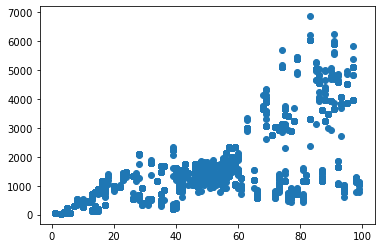

In [74]:
# Independent variable = spending_score
SS_LP_X = reviews_clean['spending_score'] 

# Dependent variable = loyalty_points
SS_LP_Y = reviews_clean['loyalty_points'] 

SS_LP_test = simpleLR_OLS(SS_LP_X,SS_LP_Y)

In [85]:
# Extract the useful values
simpleLR_OLS_useful(SS_LP_test)


Parameters: 
 Intercept   -75.052663
x            33.061693
dtype: float64 

Standard errors: 
 Intercept    45.930554
x             0.814419
dtype: float64 

Predicted values: 
 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314] 



In [88]:
# Generate the linear regression model.
# Set the the X coefficient and the constant to generate the regression table.
SS_LP_Y_pred = (-75.052663) + 33.061693 * SS_LP_X

# View the output
SS_LP_Y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

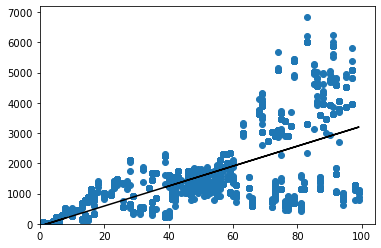

In [93]:
# Plot the graph with a regression line.
simpleLR_plot(SS_LP_X, SS_LP_Y, SS_LP_Y_pred)

### Useful values: 
__R-squared__ = 0.452 <br>
__Adjusted R-squared__ = 0.452 <br>
> low R-squared value

__p-value__ = 2.92e-263 <br>

__coefficient__ = 33.0617 (positive) <br>
> Generally positive relationship between spending and loyalty points

__(P>|t|)__ = 0.000  <br>
> (significant slope)

__95% confidence interval__ = [31.464 34.659] <br>

## 5b) remuneration vs loyalty

> Remuneration refers to the customer's annual income (in pounds)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        11:19:51   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

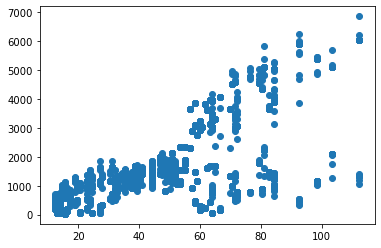

In [95]:
# Independent variable = remuneration
R_LP_X = reviews_clean['remuneration'] 

# Dependent variable = loyalty_points
R_LP_Y = reviews_clean['loyalty_points'] 

R_LP_test = simpleLR_OLS(R_LP_X,R_LP_Y)

In [96]:
# Extract the useful values
simpleLR_OLS_useful(R_LP_test)


Parameters: 
 Intercept   -65.686513
x            34.187825
dtype: float64 

Standard errors: 
 Intercept    52.170717
x             0.977925
dtype: float64 

Predicted values: 
 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671] 



In [97]:
# Generate the linear regression model.
# Set the the X coefficient and the constant to generate the regression table.
R_LP_Y_pred = (-65.686513) + 34.187825 * R_LP_X

# View the output
R_LP_Y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

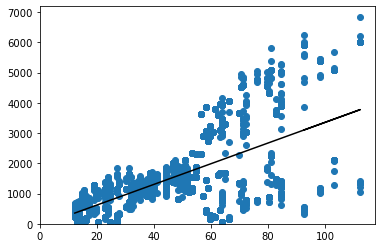

In [101]:
# Plot the graph with a regression line.
simpleLR_plot(R_LP_X, R_LP_Y, R_LP_Y_pred)

### Useful values: 
__R-squared__ = 0.380 <br>
__Adjusted R-squared__ = 0.379 <br>
> low R-squared value

__p-value__ = 2.43e-209 <br>

__coefficient__ = 34.1878 (positive) <br>
> Generally positive relationship between remuneration and loyalty points

__(P>|t|)__ = 0.000  <br>
> (significant slope)

__95% confidence interval__ = [32.270      36.106] <br>

### Other observations
 
 #### 1. Hypothesis: 2 distinct trends for remuneration vs loyalty points
 > There appears to be 2 distinct trends within the scatter plot
 > 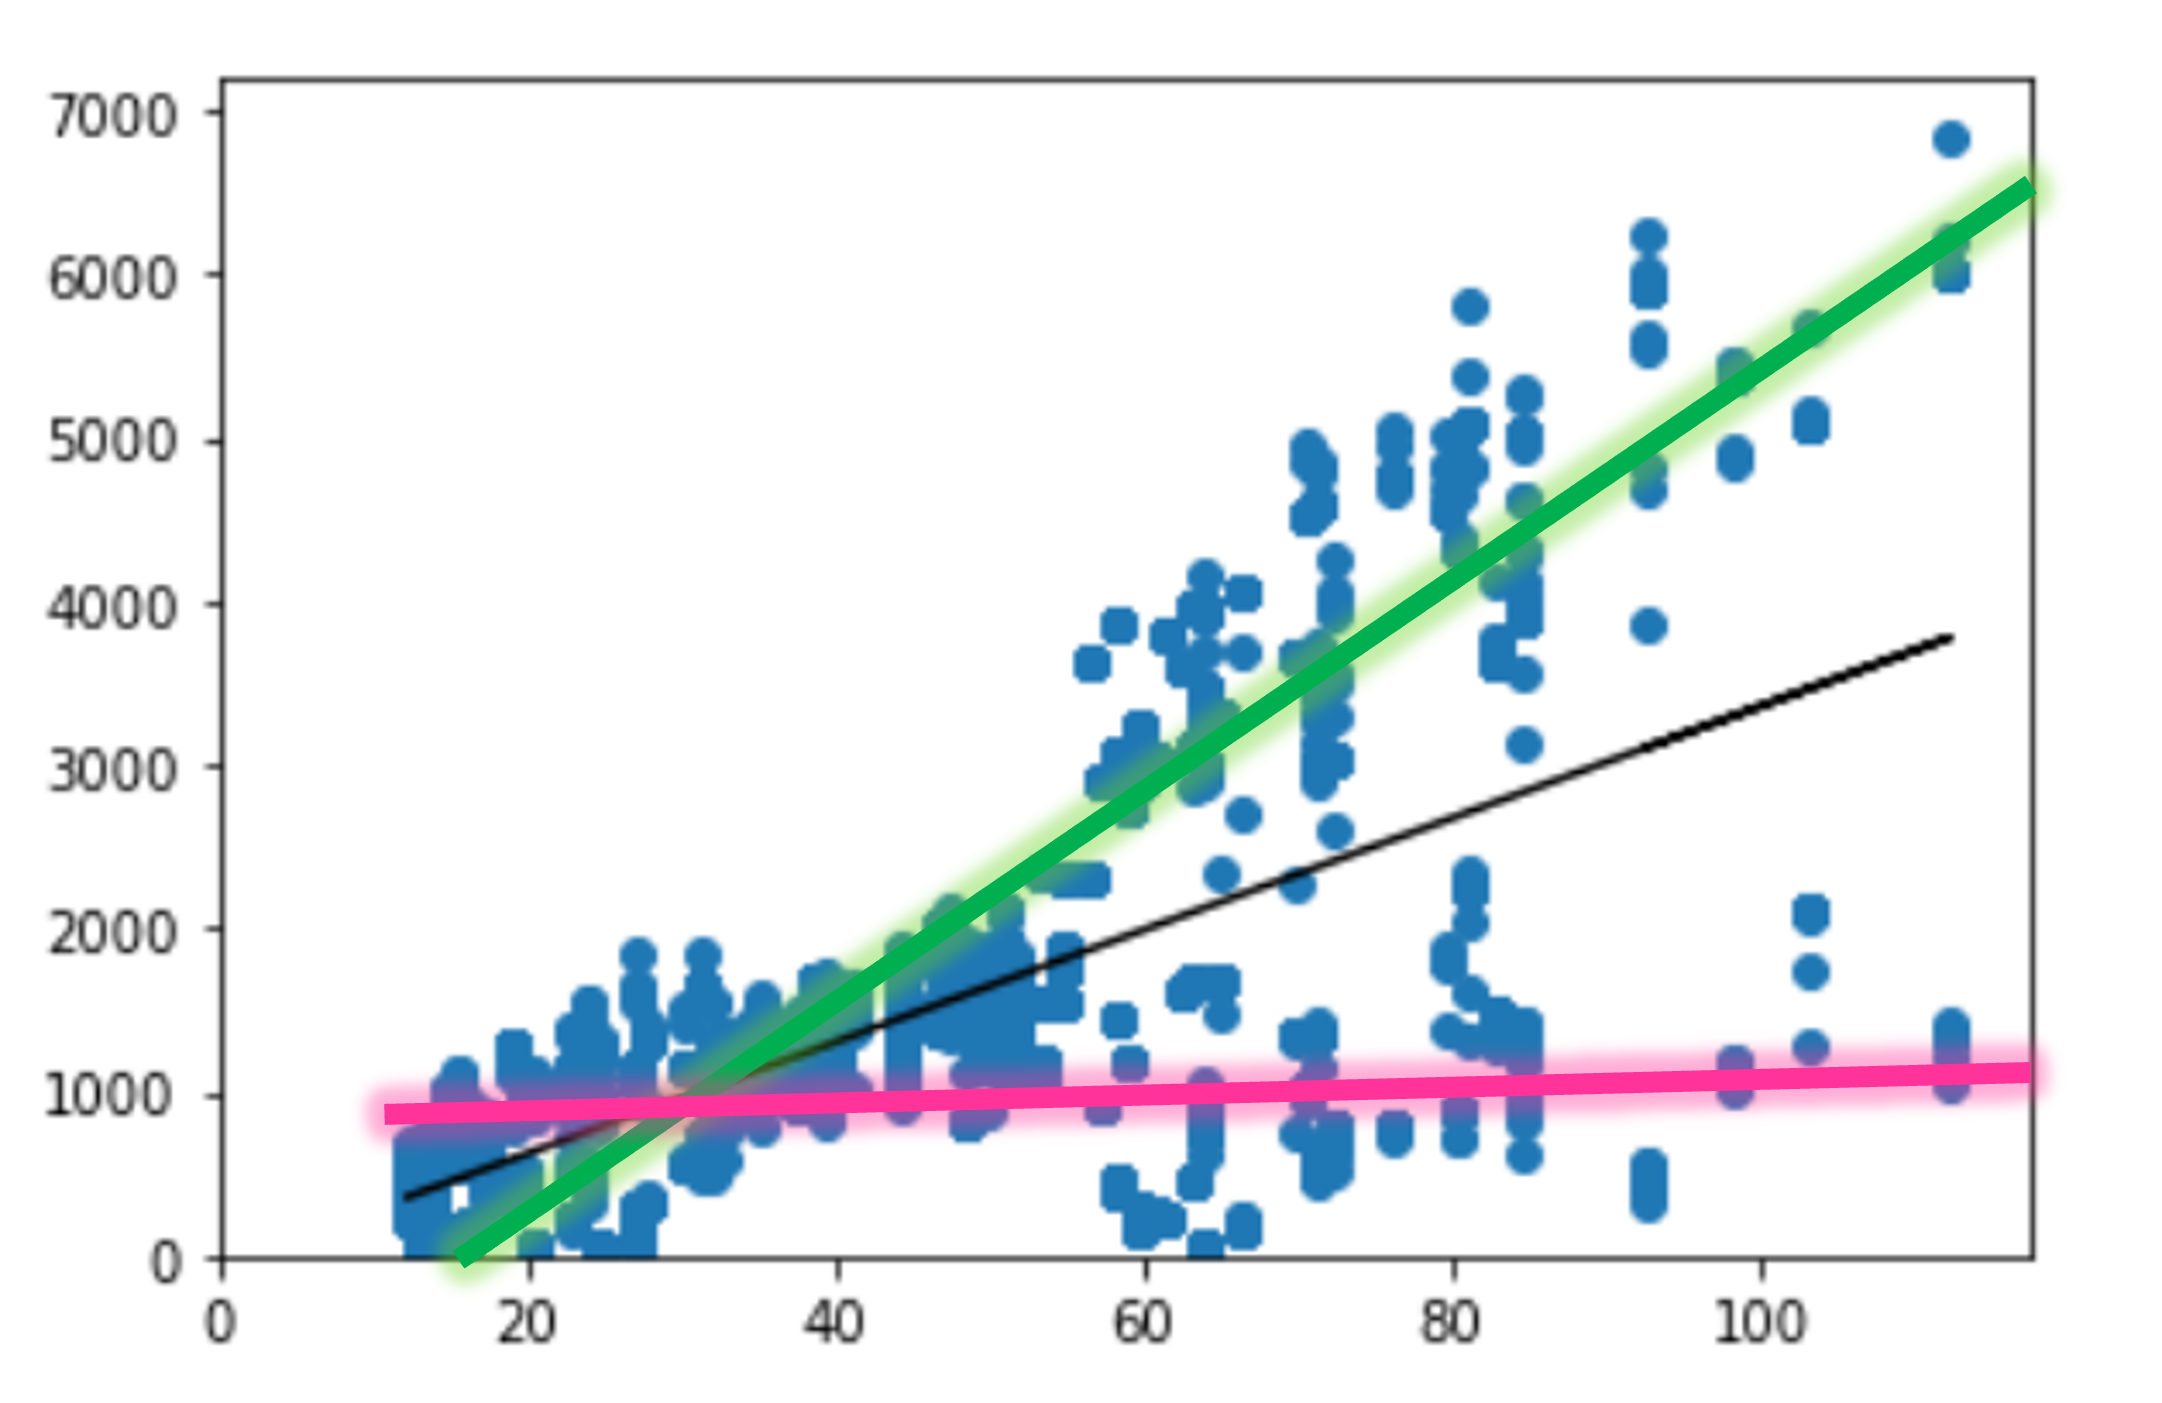
 > There might be a second dependant variable that further divides the customer base into 2 groups, for 1 of which the loyalty points is more closely related to the remuneration amount

### 5c) age vs loyalty

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 17 Dec 2022   Prob (F-statistic):             0.0577
Time:                        11:23:55   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

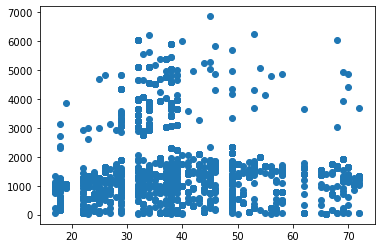

In [102]:
# Independent variable = age
A_LP_X = reviews_clean['age'] 

# Dependent variable = loyalty_points
A_LP_Y = reviews_clean['loyalty_points'] 

A_LP_test = simpleLR_OLS(A_LP_X,A_LP_Y)

In [103]:
# Extract the useful values
simpleLR_OLS_useful(A_LP_test)


Parameters: 
 Intercept    1736.517739
x              -4.012805
dtype: float64 

Standard errors: 
 Intercept    88.248731
x             2.113177
dtype: float64 

Predicted values: 
 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ] 



In [104]:
# Generate the linear regression model.
# Set the the X coefficient and the constant to generate the regression table.
A_LP_Y_pred = (1736.517739) + -4.012805 * A_LP_X

# View the output
A_LP_Y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

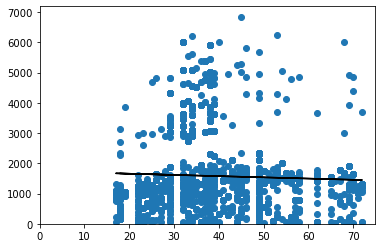

In [105]:
# Plot the graph with a regression line.
simpleLR_plot(A_LP_X, A_LP_Y, A_LP_Y_pred)

### Useful values: 
__R-squared__ = 0.002 <br>
__Adjusted R-squared__ = 0.001 <br>
> negligible R-squared value <br>
> __Model CANNOT be used to predict loyalty points based on customer's age__

__p-value__ = 0.0577 <br>

__coefficient__ = -4.0128 (negative) <br>
> Generally negative relationship between age and loyalty points <br>
> However, the __relationship is insignificant__

__(P>|t|)__ = 0.058  <br>
> (insignificant slope)

__95% confidence interval__ = [-8.157       0.131] <br>

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [24]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load the CSV file(s) as df2.


# View DataFrame.


In [26]:
# Drop unnecessary columns.


# View DataFrame.


In [27]:
# Explore the data.


In [28]:
# Descriptive statistics.


## 2. Plot

In [29]:
# Create a scatterplot with Seaborn.


In [30]:
# Create a pairplot with Seaborn.


## 3. Elbow and silhoutte methods

In [31]:
# Determine the number of clusters: Elbow method.


In [32]:
# Determine the number of clusters: Silhouette method.


## 4. Evaluate k-means model at different values of *k*

## 5. Fit final model and justify your choice

In [33]:
# Apply the final model.


In [34]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

In [35]:
# Visualising the clusters.


# View the DataFrame.


In [36]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [37]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 